# 이진 분류(Binary Classification)
### 와인의 종류를 분류하는 문제(레드 와인, 화이트 와인)
---
- 데이터 셋: 와인 데이터(winequality-rw.csv)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv
To: /content/winequality-rw.csv
421kB [00:00, 22.1MB/s]       


In [ ]:
wine = pd.read_csv('winequality-rw.csv', index_col=0)
wine.shape

(6497, 13)

In [ ]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  target                6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
# 결측치
wine.isna().sum(axis=0)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [ ]:
df = wine.copy()

In [ ]:
df['target'].value_counts()

white    4898
red      1599
Name: target, dtype: int64

In [ ]:
df['target'] = df['target'].map({'red': 0, 'white': 1})

In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5197, 12) (1300, 12)
(5197,) (1300,)


- 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [ ]:
X_train_s.shape

(5197, 12)

### 모델링(Modeling)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(12,)), 
    layers.Dense(32, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


### 컴파일(Compile)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
    )

### 학습(Training)

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/100
130/130 [==============================] - 4s 16ms/step - loss: 0.1987 - acc: 0.9658 - val_loss: 0.0462 - val_acc: 0.9933
Epoch 2/100
130/130 [==============================] - 1s 8ms/step - loss: 0.0342 - acc: 0.9935 - val_loss: 0.0278 - val_acc: 0.9962
Epoch 3/100
130/130 [==============================] - 1s 7ms/step - loss: 0.0246 - acc: 0.9952 - val_loss: 0.0244 - val_acc: 0.9962
Epoch 4/100
130/130 [==============================] - 1s 5ms/step - loss: 0.0208 - acc: 0.9964 - val_loss: 0.0228 - val_acc: 0.9962
Epoch 5/100
130/130 [==============================] - 1s 7ms/step - loss: 0.0173 - acc: 0.9971 - val_loss: 0.0208 - val_acc: 0.9971
Epoch 6/100
130/130 [==============================] - 1s 6ms/step - loss: 0.0154 - acc: 0.9971 - val_loss: 0.0204 - val_acc: 0.9971
Epoch 7/100
130/130 [==============================] - 1s 5ms/step - loss: 0.0134 - acc: 0.9971 - val_loss: 0.0198 - val_acc: 0.9971
Epoch 8/100
130/130 [==============================] - 1s 5ms/step -

- 학습 과정 시각화

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

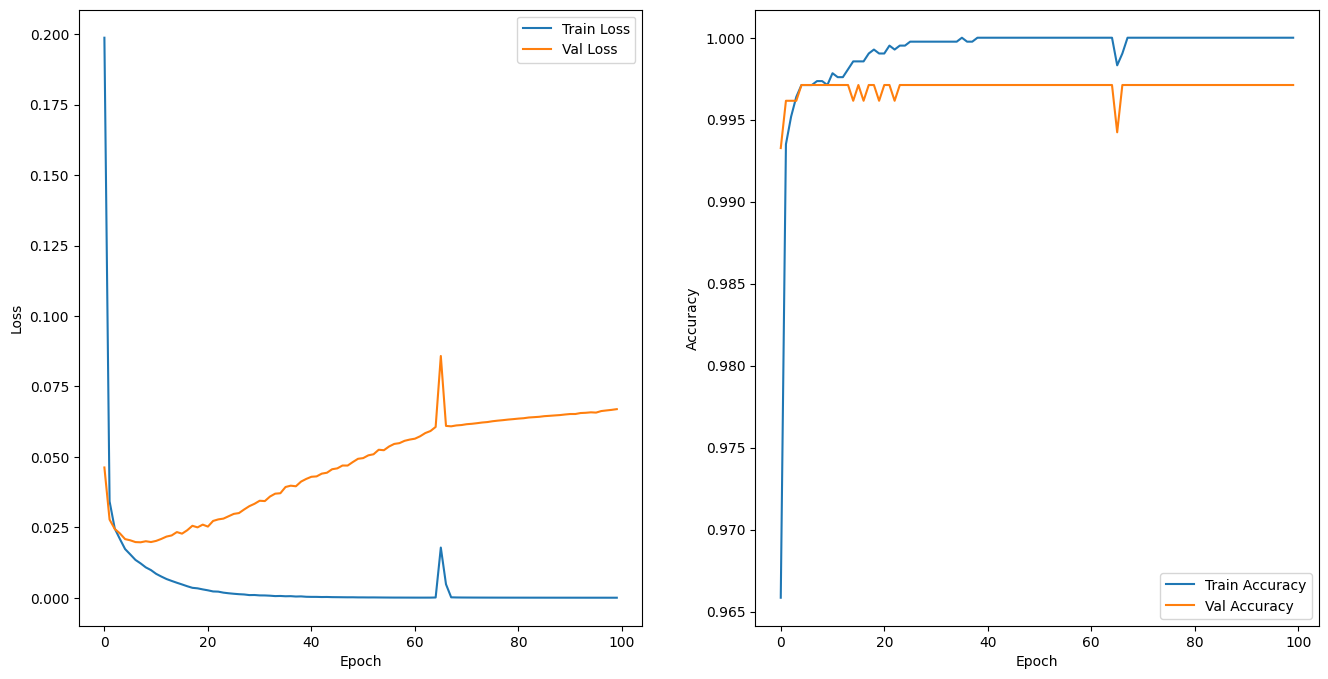

In [ ]:
plot_history(history)

### 평가(Evaluation)

In [ ]:
model.evaluate(X_train_s, y_train)

163/163 [==============================] - 0s 2ms/step - loss: 0.0134 - acc: 0.9994


[0.013407927937805653, 0.9994227290153503]

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [ ]:
model.evaluate(X_test_s, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.1152 - acc: 0.9915


[0.11515036970376968, 0.9915384650230408]

### 예측(Prediction)

In [ ]:
y_pred = model.predict(X_test_s)
y_pred

41/41 [==============================] - 0s 2ms/step


array([[1.000000e+00],
       [7.800874e-18],
       [1.000000e+00],
       ...,
       [1.000000e+00],
       [5.878227e-07],
       [1.000000e+00]], dtype=float32)

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
y_pred = y_pred.flatten()
y_pred = (y_pred>0.5).astype('int')
y_pred

array([1, 0, 1, ..., 1, 0, 1])

- 혼동 행렬(confusion matrix)

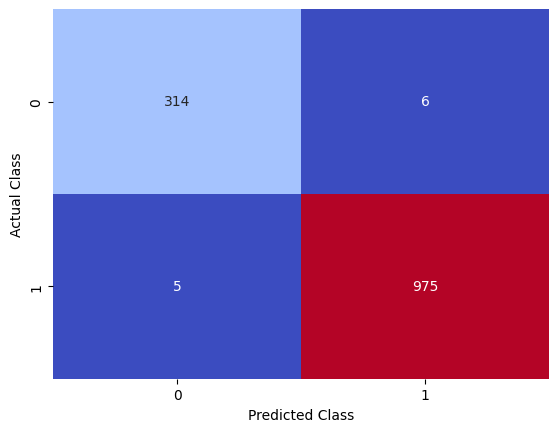

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='coolwarm', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()